# Graphlet Analysis

Remember, in notebook *Thresholding*, I thresholded contact maps and save them
in a way that orca can read them.

In this notebook, I perform two actions:
1. I separate orbits extracted from each cell lines and put them together.
in such way, orbit 0 of the cells will be in a file, orbits 1 will be i.
in such way, separate file and so forth until the 72nd orbit.

2. I then run mine.jar on the files to extract the pairwise MIC values. As a result of this
step, I will have pairwise MIC comparison between all cell lines for all orbitals of a 
certain chromosome.

By repeating steps 1 and 2 for all 23 chromosomes, I will have pairwise MIC values for all
orbitals of all cell lines. I woulb eventually be able to have a data array of shape
``` A(23 * 73) ```, where the rows correspond to the chromosomes and columns correspond
to orbits.


In [102]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


The following R-script reads graphlet files corresponding the a chromosome which
are located under ```data/*.edges```. It then writes the resulting orbits into
```data/*.graphlets```.

In [2]:
#for chr1 in range(1, 24):
#    os.system('Rscript rscript.r %s'%chr1)

I can now read the orbital files and put them into a $N \times O$ matrix where $N$ denotes
number of loci in the chromosome and $O$ denotes the number or obitals extracted, which 
can be either 14 or 73 (depending on whether ```count4()``` or ```count5()``` are called
in the R-script above.

In [3]:
chr1 = 2
graphlets_mit = readMat("data/chr%02d_chr%02d_mit.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_all = readMat("data/chr%02d_chr%02d_all.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_rl = readMat("data/chr%02d_chr%02d_rl.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_call4 = readMat("data/chr%02d_chr%02d_call4.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
print(graphlets_mit.shape)
print(graphlets_all.shape)
print(graphlets_rl.shape)
print(graphlets_call4.shape)

file directory: data/chr02_chr02_mit.graphlets
file directory: data/chr02_chr02_all.graphlets
file directory: data/chr02_chr02_rl.graphlets
file directory: data/chr02_chr02_call4.graphlets
(478, 73)
(478, 73)
(478, 73)
(478, 73)


Loci-wise correlations

In [37]:
mit_all_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_all)

In [38]:
mit_mit_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_mit)

In [39]:
mit_call4_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_call4)

In [72]:
mit_rl_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_rl)


Number of columnts: 2


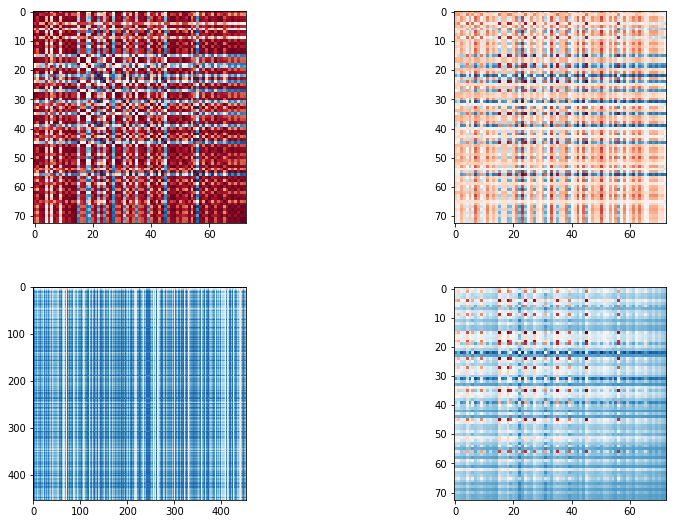

In [73]:
pylab.rcParams['figure.figsize'] = (15, 9)
images = [ mit_mit_corr
          , mit_all_corr
         , mit_rl_corr
         , mit_call4_corr]
showImages(images, 2)

In [42]:
print_statistics(mit_mit_corr)
print_statistics(mit_all_corr)
print_statistics(mit_rl_corr)
print_statistics(mit_call4_corr)

#-----------------------------------------------------------------------#
Stats for : 
max: 4.469785 | min: 0.000000 | median: 0.136091 | mean: 0.203402 | std: 0.420273
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.469785 | min: 0.000000 | median: 0.343362 | mean: 0.409033 | std: 0.429832
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.469785 | min: 0.000000 | median: 0.466435 | mean: 0.541932 | std: 0.457313
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.469785 | min: 0.000000 | median: 0.265432 | mean: 0.337970 | std: 0.428777
#-----------------------------------------------------------------------#


(4.469785081645387, 0.0, 0.33797040252082633, 0.42877716626680784)

In [44]:
print_statistics(np.diagonal(mit_mit_corr))
print_statistics(np.diagonal(mit_all_corr))
print_statistics(np.diagonal(mit_rl_corr))
print_statistics(np.diagonal(mit_call4_corr))
n = mit_mit_corr.shape[0]
#t1 = (t_test(np.diagonal(mit_mit_corr)))
t2 = (t_test(np.diagonal(mit_all_corr)))
t3 = (t_test(np.diagonal(mit_rl_corr)))
t4 = (t_test(np.diagonal(mit_call4_corr)))
print(n)
#print(t1)
print(t2)
print(t3)
print(t4)
from scipy.stats import t
print("p-value for mit-all: %10.3e"%(1 - t.cdf(t2, n-1)))
print("p-value for mit-rl: %10.3e"%(1 - t.cdf(t3, n-1)))
print("p-value for mit-call4: %10.3e"%(1 - t.cdf(t4, n-1)))

#-----------------------------------------------------------------------#
Stats for : 
max: 0.000000 | min: 0.000000 | median: 0.000000 | mean: 0.000000 | std: 0.000000
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.973949 | min: 0.000000 | median: 0.339569 | mean: 0.360772 | std: 0.178537
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 3.519186 | min: 0.000000 | median: 0.469182 | mean: 0.506374 | std: 0.264010
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.537686 | min: 0.000000 | median: 0.260365 | mean: 0.286397 | std: 0.158706
#-----------------------------------------------------------------------#
453
19.054681079085885
18.85

In [50]:
for chr1 in range(1, 2):
    graphlets_mit = readMat\
    ("data/chr%02d_chr%02d_mit.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
    graphlets_all = readMat\
    ("data/chr%02d_chr%02d_all.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
    graphlets_rl = readMat\
    ("data/chr%02d_chr%02d_rl.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
    graphlets_call4 = readMat\
    ("data/chr%02d_chr%02d_call4.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
    

file directory: data/chr01_chr01_mit.graphlets
file directory: data/chr01_chr01_all.graphlets
file directory: data/chr01_chr01_rl.graphlets
file directory: data/chr01_chr01_call4.graphlets


In [78]:
mit_all_corr_orbit_wise = \
    pearson(graphlets_mit.T, graphlets_all.T)

In [79]:
mit_mit_corr_orbit_wise= \
    pearson(graphlets_mit.T, graphlets_mit.T)

In [80]:
mit_call4_corr_orbit_wise= \
    pearson(graphlets_mit.T, graphlets_call4.T)

In [81]:
mit_rl_corr_orbit_wise= \
    pearson(graphlets_mit.T, graphlets_rl.T)


Number of columnts: 2


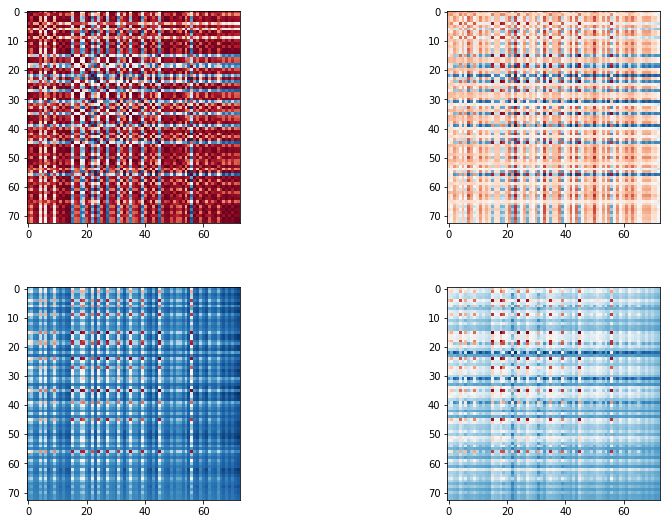

In [83]:
pylab.rcParams['figure.figsize'] = (15, 9)
images = [ mit_mit_corr_orbit_wise
          , mit_all_corr_orbit_wise
         , mit_rl_corr_orbit_wise
         , mit_call4_corr_orbit_wise
         ]
showImages(images, 2)

In [77]:
print_statistics(np.diagonal(mit_mit_corr_obit_wise))
print_statistics(np.diagonal(mit_all_corr_obit_wise))
print_statistics(np.diagonal(mit_rl_corr_obit_wise))
print_statistics(np.diagonal(mit_call4_corr_obit_wise))

#-----------------------------------------------------------------------#
Stats for : 
max: 1.000000 | min: 1.000000 | median: 1.000000 | mean: 1.000000 | std: 0.000000
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 0.691546 | min: 0.264693 | median: 0.447225 | mean: 0.458319 | std: 0.107821
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 3.519186 | min: 0.000000 | median: 0.469182 | mean: 0.506374 | std: 0.264010
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 0.735380 | min: 0.067395 | median: 0.209633 | mean: 0.266105 | std: 0.183532
#-----------------------------------------------------------------------#


(0.7353797764409102,
 0.06739518837952839,
 0.2661048224206581,
 0.18353246262138104)

Now Let's repeat the above procedure for all 23 chromosomes and store them in a dictionary:

In [115]:
cells = ['mit', 'all', 'rl', 'call4']
graphlets = [ None ] * 24
for chr1 in range(1, 24):
    graphlets[chr1] = {}
    for cell in cells:
       graphlets[chr1][cell] = readMat\
    ("data/chr%02d_chr%02d_%s.graphlets"%(chr1, chr1, cell), delimiter=" ").astype('uint32') 
    
correlations = {}
for cell1 in cells:
    correlations[cell1] = {}
    for cell2 in cells:
        if cell1 == cell2:
            continue
        correlations[cell1][cell2] = np.zeros((24, 73))
        #cell (i, j) will store correlation between orbital j in 
        #ith chromosome
        
for chr1 in range(1, 24):
    for cell1 in correlations:
        for cell2 in correlations[cell1]:
            correlations[cell1][cell2][chr1, :] = \
                np.diagonal(pearson(graphlets[chr1][cell1].T, graphlets[chr1][cell2].T))

file directory: data/chr01_chr01_mit.graphlets
file directory: data/chr01_chr01_all.graphlets
file directory: data/chr01_chr01_rl.graphlets
file directory: data/chr01_chr01_call4.graphlets
file directory: data/chr02_chr02_mit.graphlets
file directory: data/chr02_chr02_all.graphlets
file directory: data/chr02_chr02_rl.graphlets
file directory: data/chr02_chr02_call4.graphlets
file directory: data/chr03_chr03_mit.graphlets
file directory: data/chr03_chr03_all.graphlets
file directory: data/chr03_chr03_rl.graphlets
file directory: data/chr03_chr03_call4.graphlets
file directory: data/chr04_chr04_mit.graphlets
file directory: data/chr04_chr04_all.graphlets
file directory: data/chr04_chr04_rl.graphlets
file directory: data/chr04_chr04_call4.graphlets
file directory: data/chr05_chr05_mit.graphlets
file directory: data/chr05_chr05_all.graphlets
file directory: data/chr05_chr05_rl.graphlets
file directory: data/chr05_chr05_call4.graphlets
file directory: data/chr06_chr06_mit.graphlets
file dir

In [116]:
print(correlations['mit']['all'])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.46109972  0.47701322  0.48003156 ...  0.34422341  0.35664304
   0.2646935 ]
 [ 0.39717965  0.3998925   0.4070023  ...  0.28020517  0.45917279
   0.39832959]
 ...
 [ 0.3819262   0.42540966  0.25777002 ...         nan         nan
          nan]
 [ 0.34978792  0.37160293  0.25660723 ... -0.03030303 -0.04615385
          nan]
 [ 0.33514612  0.38646061  0.24068028 ...  0.05887501  0.03497093
   0.00716601]]


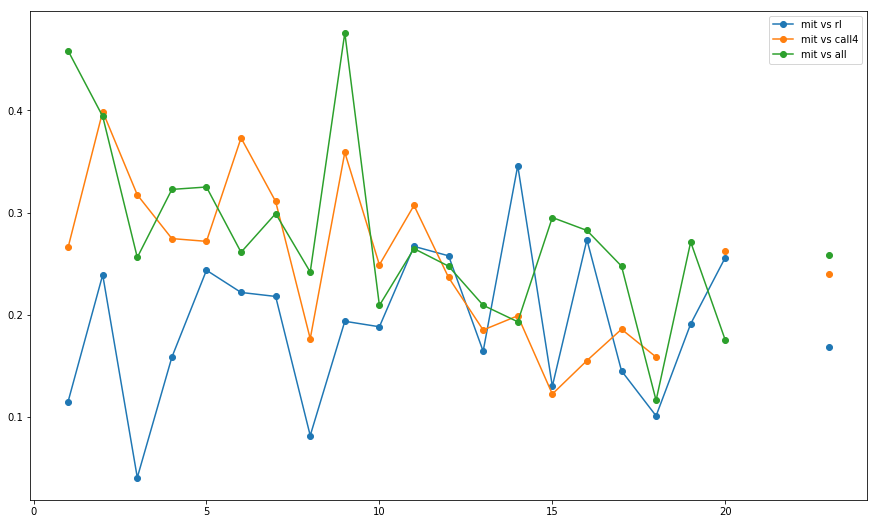

In [138]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
ax = plt.subplot(1, 1, 1)
for cell in correlations['mit']:
    y = np.mean(correlations['mit'][cell][1:,:], axis=1)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
plt.legend()
plt.show()

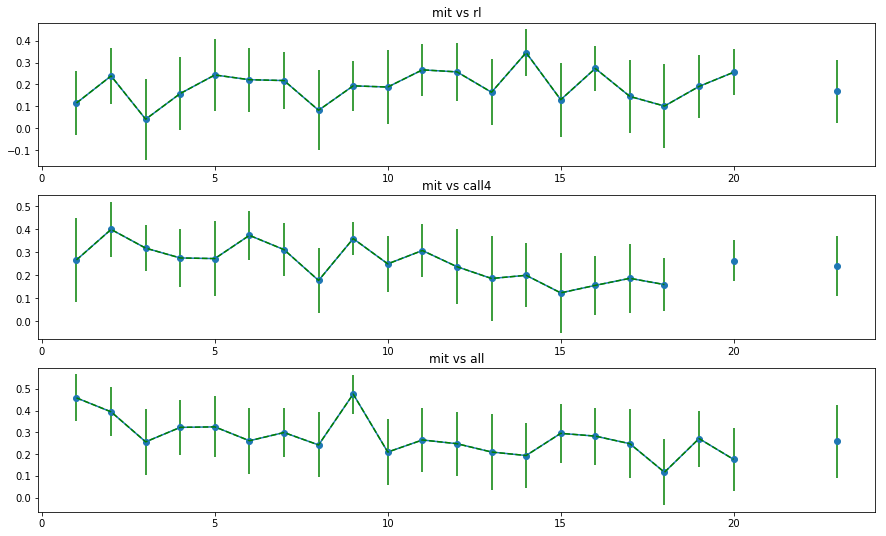

In [146]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
count = 1
for cell in correlations['mit']:
    ax = plt.subplot(3, 1, count)
    count += 1
    y = np.mean(correlations['mit'][cell][1:,:], axis=1)
    y_error = np.std(correlations['mit'][cell][1:,:], axis=1)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
    ax.errorbar(x, y, yerr=y_error, linestyle="dashed", marker="None", color="green")
    ax.set_title("mit vs %s"%cell)
plt.show()

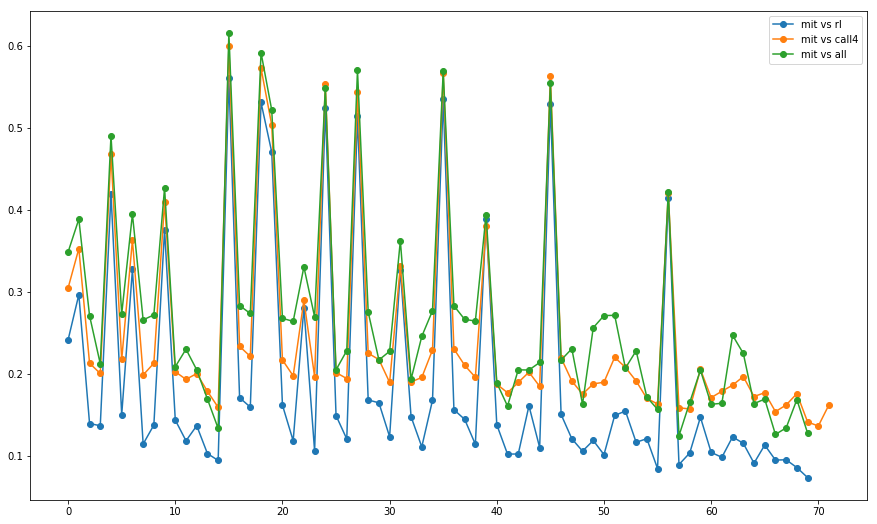

In [137]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(73)
ax = plt.subplot(1, 1, 1)
for cell in correlations['mit']:
    y = np.mean(correlations['mit'][cell][1:,:], axis=0)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
plt.legend()
plt.show()

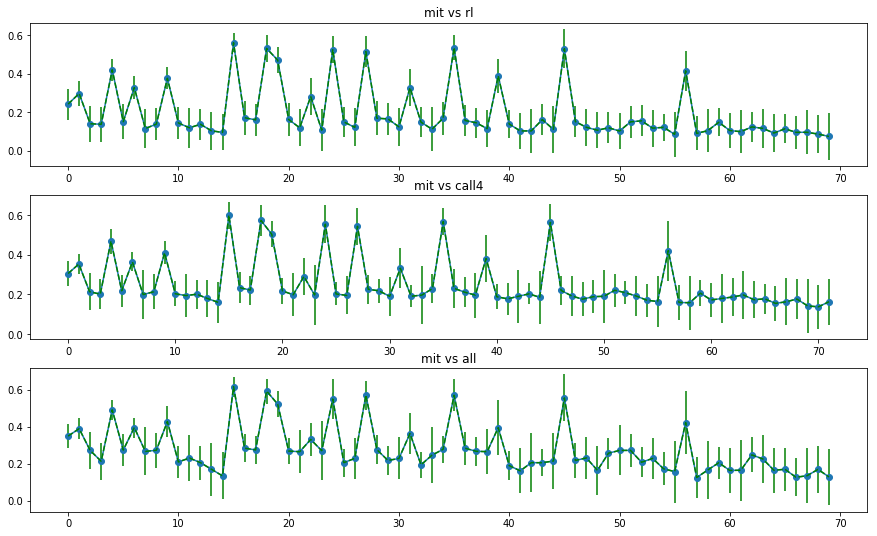

In [147]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(0, 73)
count = 1
for cell in correlations['mit']:
    ax = plt.subplot(3, 1, count)
    count += 1
    y = np.mean(correlations['mit'][cell][1:,:], axis=0)
    y_error = np.std(correlations['mit'][cell][1:,:], axis=0)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
    ax.errorbar(x, y, yerr=y_error, linestyle="dashed", marker="None", color="green")
    ax.set_title("mit vs %s"%cell)
plt.show()

Compare The cancer cells only:

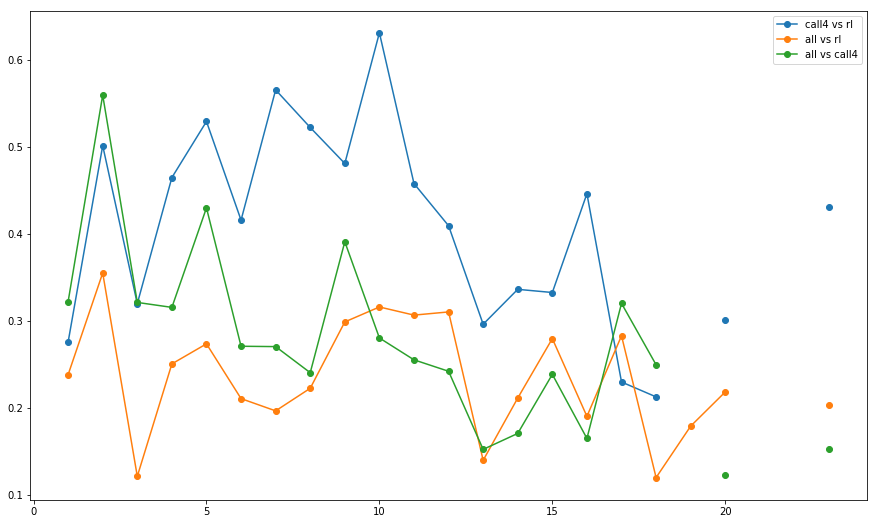

In [151]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
ax = plt.subplot(1, 1, 1)
for cell1 in correlations:
    if cell1 == 'mit':
        continue
    for cell2 in correlations[cell1]:
        if cell2 == 'mit' or cell1 > cell2:
            continue
        y = np.mean(correlations[cell1][cell2][1:,:], axis=1)
        ax.plot(x, y, marker="o", label="%s vs %s"%(cell1, cell2))
plt.legend()
plt.show()